# Graduate Rotational Internship Program

# The Sparks Foundation

# Task - 2 : Prediction using Unsupervised ML

# Author : Yashmita 

**Problem statement - From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

Dataset - https://bit.ly/3kXTdox

# Step 1 - Importing the required libraries

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 
from sklearn import datasets
import seaborn as sns

# Step 2 - Loading the dataset

In [38]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) # See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Step 3 - Determine the optimum number of clusters using k-means classifier

To determine the optimal number of clusters for K-means classification using the "elbow method" from scikit-learn library. It iteratively fits K-means models with different numbers of clusters (ranging from 1 to 10) to a dataset (assumed to be loaded as 'iris_df') and computes the Within-Cluster Sum of Squares (WCSS) for each. The WCSS values are then plotted on a graph, and the "elbow" point, where the rate of WCSS decrease levels off, is identified as the optimal number of clusters.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


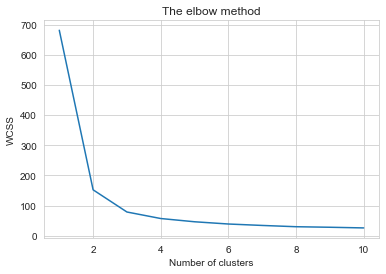

In [39]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**INFERENCE** -

It is infered that there are 3 optimum number of clusters from the graph. 

In [40]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Step 4 - plot the clusters

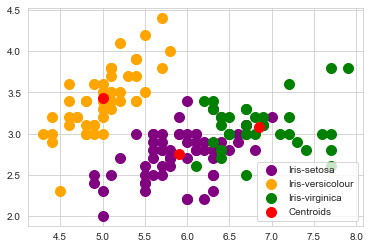

In [41]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

**INFERENCE**

This plot visualizes the clusters formed by K-means clustering on the Iris dataset. It uses different colors and labels to distinguish between the three species of Iris flowers (setosa, versicolour, and virginica). Additionally, it marks the cluster centroids with red points.

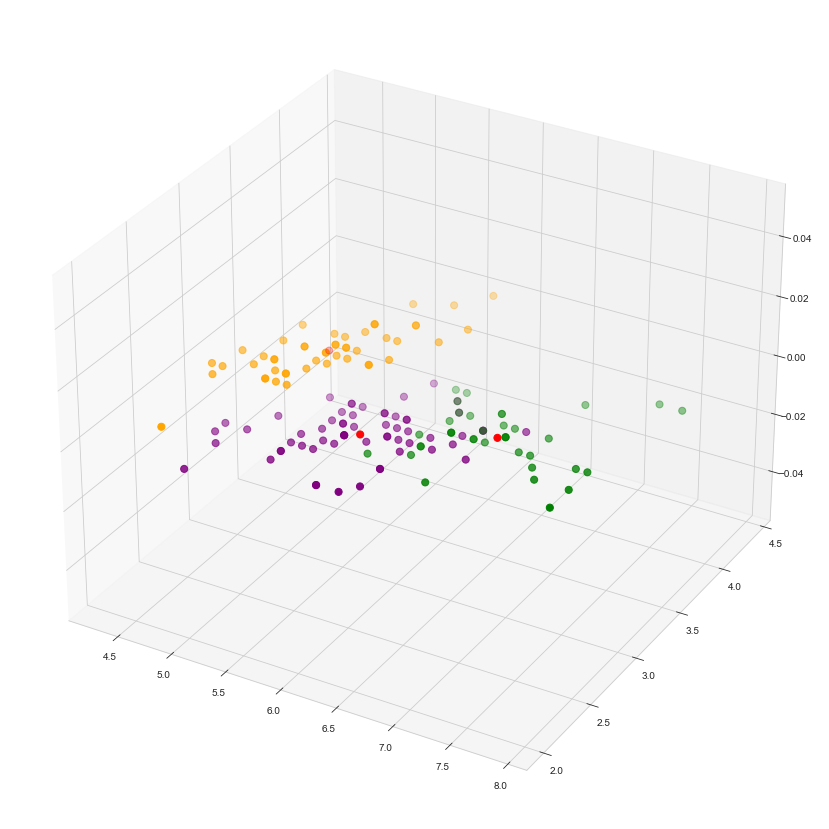

In [42]:
 #3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.show()

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


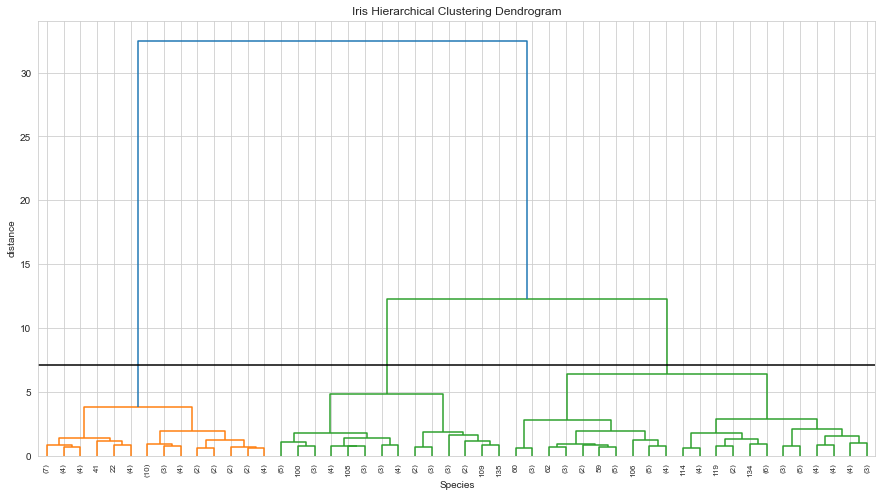

In [24]:
print(iris.target_names)
print(iris.target)
x = iris.data
y = iris.target
#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()


# Step 5 - Data Preprocessing

In [7]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [8]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


# Step 6 - Model Training

In [10]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [11]:
print(iris_k_mean_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [12]:
print(iris_k_mean_model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


# Step 7 - Data Visualisation

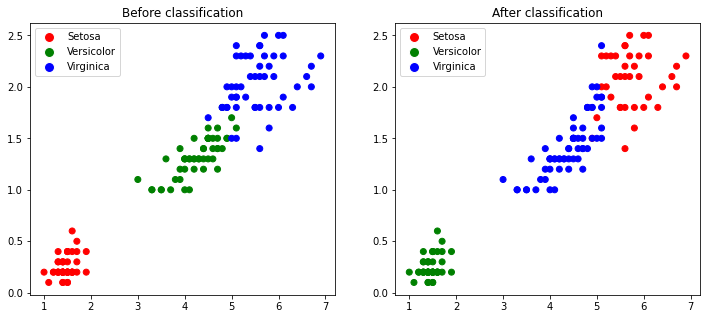

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have defined 'x', 'y', and 'predictedY' dataframes earlier

# Define colors and labels
colors = np.array(['red', 'green', 'blue'])
labels = np.array(['Setosa', 'Versicolor', 'Virginica'])

# Create legend patches
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                              markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]

# Plot the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=legend_patches)

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title('After classification')
plt.legend(handles=legend_patches)

plt.show()

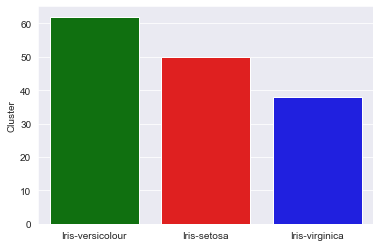

In [30]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["green", "red", "blue"]));

**INFERENCE**

This bar plot,visualizes the distribution of data points across different clusters. It uses distinct colors (green, red, and blue) to represent each cluster and displays the count of data points in each cluster on the y-axis.The dataset appears to contain approximately 62 samples of iris-versicolour, 50 samples of Iris-virginica, and an estimated 38 samples of Iris-setosa, as predicted.

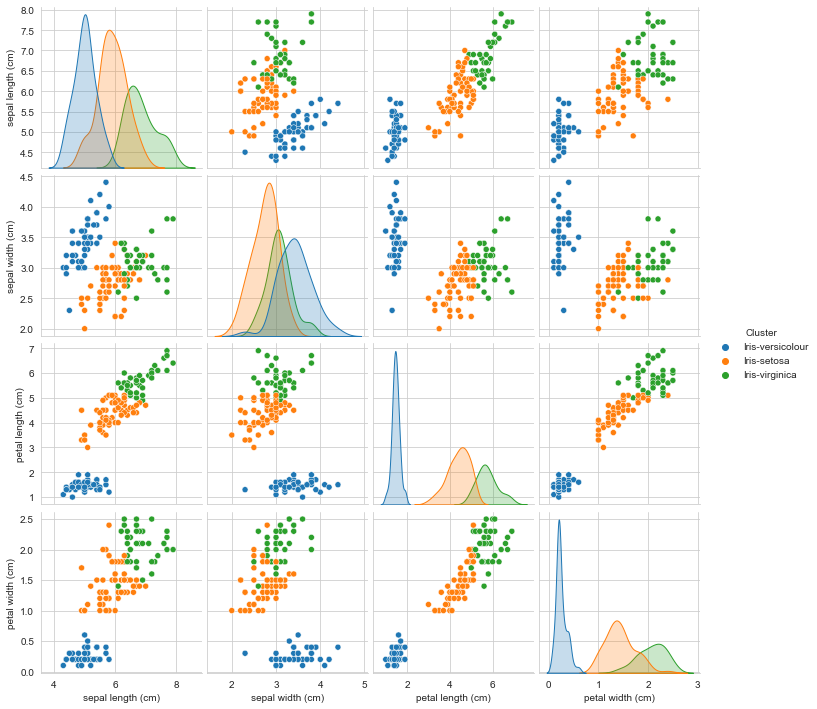

In [33]:
#pairplot
### hue = species colours plot as per species
### It will give 3 colours in the plot

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

**INFERENCE**

The code generates a pairplot using Seaborn, where data points are color-coded by the 'Cluster' variable. This provides a visual representation of relationships between pairs of variables while distinguishing clusters with three different colors corresponding to the 'Cluster' variable.

There appears to be a positive correlation, suggesting a linear relationship, between petal length and petal width. Iris-Setosa exhibits comparatively smaller petal dimensions than the other flower species. In summary, Iris-Setosa generally has smaller measurements than the other flowers in the dataset.

# Step 8 - Generating the Confusion Matrix 

In [18]:
sm.confusion_matrix(predictedY, y['Target'])

array([[ 0,  2, 36],
       [50,  0,  0],
       [ 0, 48, 14]], dtype=int64)

**INFERENCE**

In a confusion matrix, the top row represents the predicted class labels (0, 1, 2),
while the rightmost column represents the true class labels (Iris-setosa, etc.). Each cell within the matrix contains a
count that indicates how many instances of a true class were categorized into each of the predicted classes.